# Loanbook Exploratory Analysis

In [156]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

pd.options.display.max_rows = 125

Load loan data from CSV

In [3]:
loandata = pd.read_csv("data/loandata.csv", low_memory=False)

First look on data:

In [4]:
loandata.head()

,ReportAsOfEOD,LoanId,LoanNumber,ListedOnUTC,BiddingStartedOn,BidsPortfolioManager,BidsApi,BidsManual,UserName,NewCreditCustomer,...,PreviousEarlyRepaymentsCountBeforeLoan,GracePeriodStart,GracePeriodEnd,NextPaymentDate,NextPaymentNr,NrOfScheduledPayments,ReScheduledOn,PrincipalDebtServicingCost,InterestAndPenaltyDebtServicingCost,ActiveLateLastPaymentCategory
0,2017-05-04,66AE108B-532B-4BB3-BAB7-0019A46412C1,483449,2016-03-23 16:07:19,2016-03-23 16:07:19,970,1150,5.0,BO965519,False,...,0,NaN,NaN,2017-05-12,13.0,60.0,NaN,0.0,0.0,NaN
1,2017-05-04,D152382E-A50D-46ED-8FF2-0053E0C86A70,378148,2015-06-25 11:02:28,2015-06-25 11:02:28,1295,0,1705.0,BOA9K172A,False,...,1,NaN,NaN,NaN,0.0,60.0,NaN,0.0,0.0,8-15
2,2017-05-04,87342E13-66CB-483F-833A-007953E50C78,451831,2016-01-14 10:00:21,2016-01-14 10:00:21,2700,565,5835.0,BO7971663,True,...,0,NaN,NaN,2017-05-22,16.0,60.0,NaN,0.0,0.0,31-60
3,2017-05-04,87227056-6BF9-410C-98D1-008F788E122A,349381,2015-03-24 15:55:44,2015-03-24 15:55:44,1115,0,385.0,BO76151K3,True,...,1,NaN,NaN,NaN,0.0,60.0,NaN,0.0,0.0,180+
4,2017-05-04,2DDE6336-E466-4624-A337-00A0ED1A1468,443082,2015-12-17 10:12:00,2015-12-17 10:12:00,305,0,785.0,BOK423A63,True,...,0,NaN,NaN,NaN,0.0,48.0,NaN,0.0,0.0,180+


In [5]:
loandata.shape

(35513, 112)

All the columns with types and number of unique values:

In [155]:
types = [loandata[c].dtype for c in loandata.columns]
uniques = [loandata[c].unique().size for c in loandata.columns]
nans = [loandata[c].isnull().sum() for c in loandata.columns]
# + ", " + str(loandata[i].unique().size))
    
columns = pd.DataFrame(data={'names': loandata.columns, 'types': types, 'uniques': uniques, 'nans': nans})
columns = columns.set_index('names').sort_values(by='nans')
columns.head(120)

,nans,types,uniques
names,,,
ReportAsOfEOD,0,object,1
IncomeFromPension,0,float64,1094
IncomeFromFamilyAllowance,0,float64,334
IncomeFromSocialWelfare,0,float64,392
IncomeFromLeavePay,0,float64,359
IncomeFromChildSupport,0,float64,189
IncomeOther,0,float64,579
IncomeTotal,0,float64,3230
ExistingLiabilities,0,int64,32


Analyse missing values:

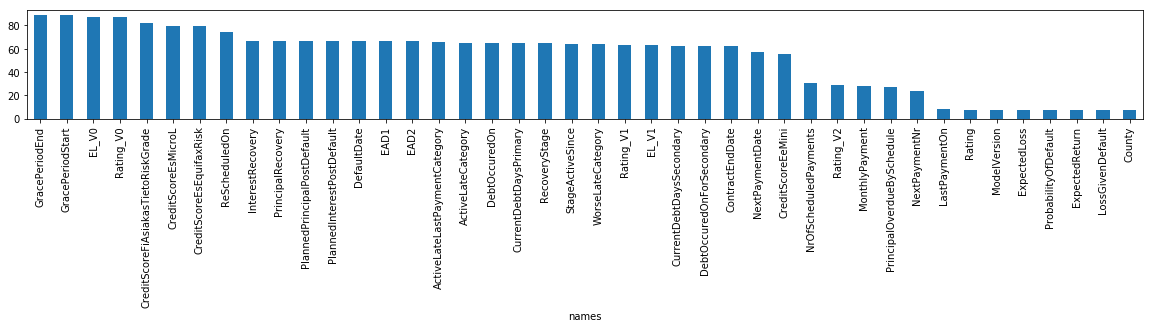

In [7]:
missingvalues = (columns['nans'] / len(loandata.index) * 100)
missingvalues = missingvalues[missingvalues > 5].sort_values(ascending=False)
missingvalues.plot(kind='bar', figsize=(20, 2))

In [8]:
missingvalues

names
GracePeriodEnd                        88.961789
GracePeriodStart                      88.961789
EL_V0                                 87.134289
Rating_V0                             87.134289
CreditScoreFiAsiakasTietoRiskGrade    82.240306
CreditScoreEsMicroL                   79.568046
CreditScoreEsEquifaxRisk              79.568046
ReScheduledOn                         74.600850
InterestRecovery                      66.372878
PrincipalRecovery                     66.372878
PlannedPrincipalPostDefault           66.372878
PlannedInterestPostDefault            66.372878
DefaultDate                           66.232084
EAD1                                  66.232084
EAD2                                  66.232084
ActiveLateLastPaymentCategory         65.716780
ActiveLateCategory                    65.232450
DebtOccuredOn                         65.190212
CurrentDebtDaysPrimary                65.190212
RecoveryStage                         65.080393
StageActiveSince                  

Let's have a look at some of the columns:

In [134]:
loandata['yearmonth'] = pd.to_datetime(loandata['ListedOnUTC']).dt.to_period('M')

Number of loans in countries per YearMonth:

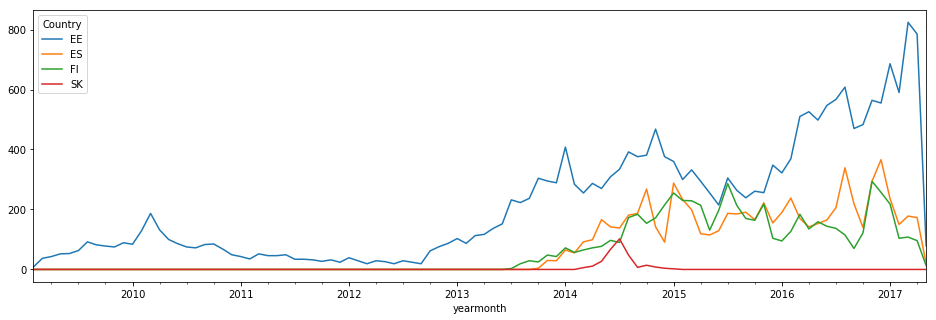

In [135]:
loandata.groupby(['yearmonth', 'Country']).size().unstack(1).sort_index(ascending=True).fillna(0).plot(figsize=(16, 5))

In [136]:
r = pd.concat([loandata['yearmonth'], loandata[['Rating', 'Rating_V0', 'Rating_V1', 'Rating_V2']].notnull()], axis=1)

Different types of rating per YearMonth:

In [153]:
g = r.groupby('yearmonth').sum()
g = g[(g.T != 0).any()]
g.head()

,Rating,Rating_V0,Rating_V1,Rating_V2
yearmonth,,,,
2012-11,5.0,0.0,5.0,0.0
2012-12,15.0,0.0,15.0,7.0
2013-01,103.0,89.0,14.0,103.0
2013-02,87.0,78.0,9.0,87.0
2013-03,113.0,103.0,10.0,113.0


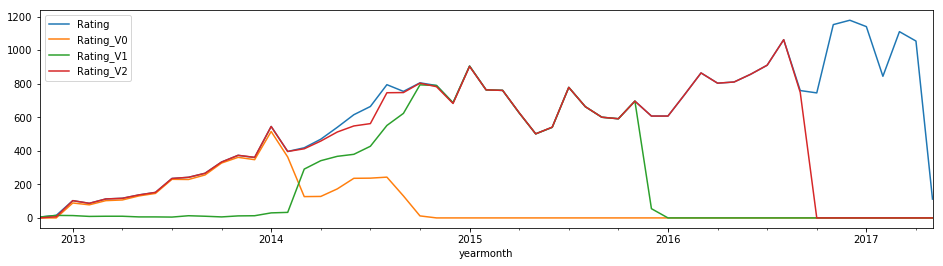

In [154]:
g.plot(figsize=(16,4))